Importing Libraries for Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

Loading xlsx file and creating dataframe out of it

In [2]:
df = pd.read_excel('/content/House Datasets.xlsx')

In [3]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


Checking for null Values

In [4]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

Data is clean

Data is clean, so next we check it for outliers

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
df.columns


Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

<Axes: >

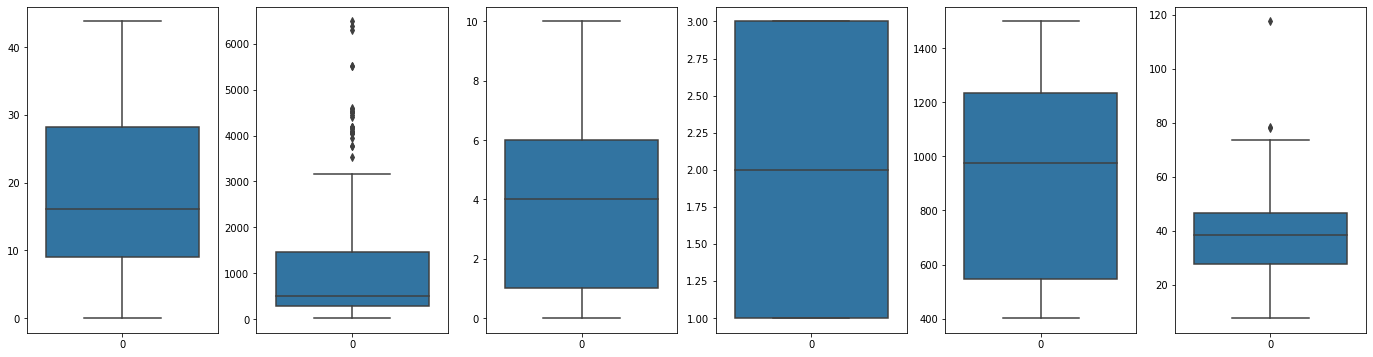

In [7]:
plt.rcParams['figure.figsize']= (24,6)

plt.subplot(1,6,1)
sb.boxplot(df['House Age'])
plt.subplot(1,6,2)
sb.boxplot(df['Distance from nearest Metro station (km)'])
plt.subplot(1,6,3)
sb.boxplot(df['Number of convenience stores'])
plt.subplot(1,6,4)
sb.boxplot(df['Number of bedrooms'])
plt.subplot(1,6,5)
sb.boxplot(df['House size (sqft)'])
plt.subplot(1,6,6)
sb.boxplot(df['House price of unit area'])

Capping outliers 

In [8]:
df['Distance from nearest Metro station (km)'].values[df['Distance from nearest Metro station (km)'].values>4500]=45000

In [9]:
df=df[~(df['House price of unit area']>75)]

In [10]:
df.shape

(411, 9)

Plotting correlation heatmap. It show how two variables are correlated. Positive Nigative or independent

<Axes: >

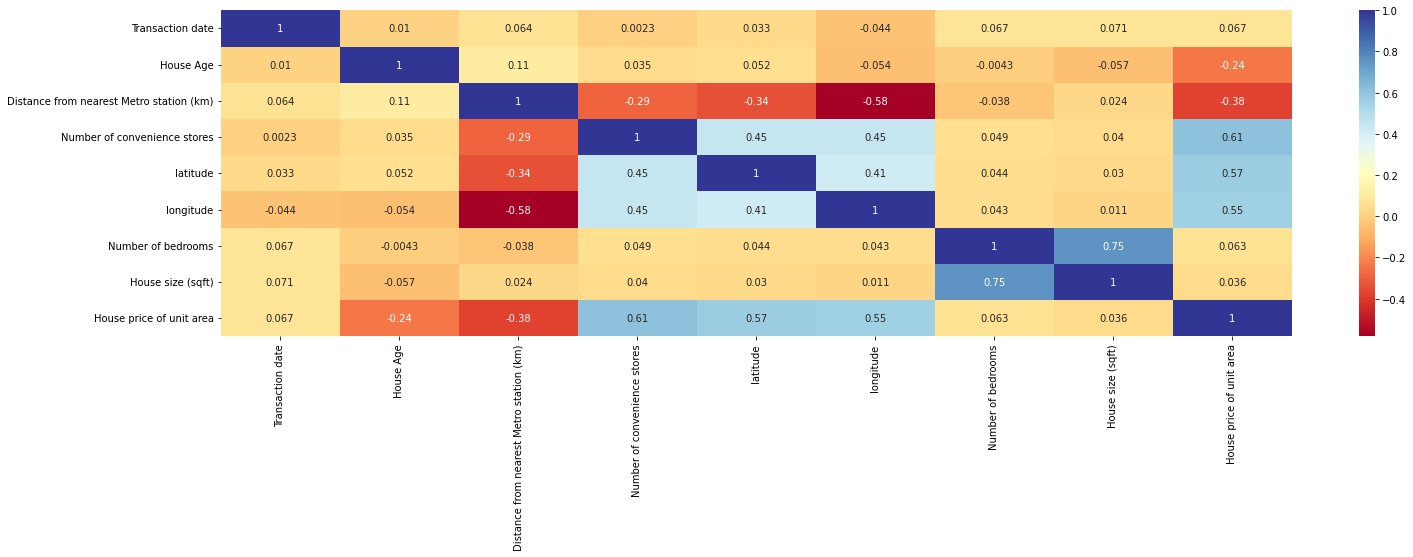

In [11]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlBu')

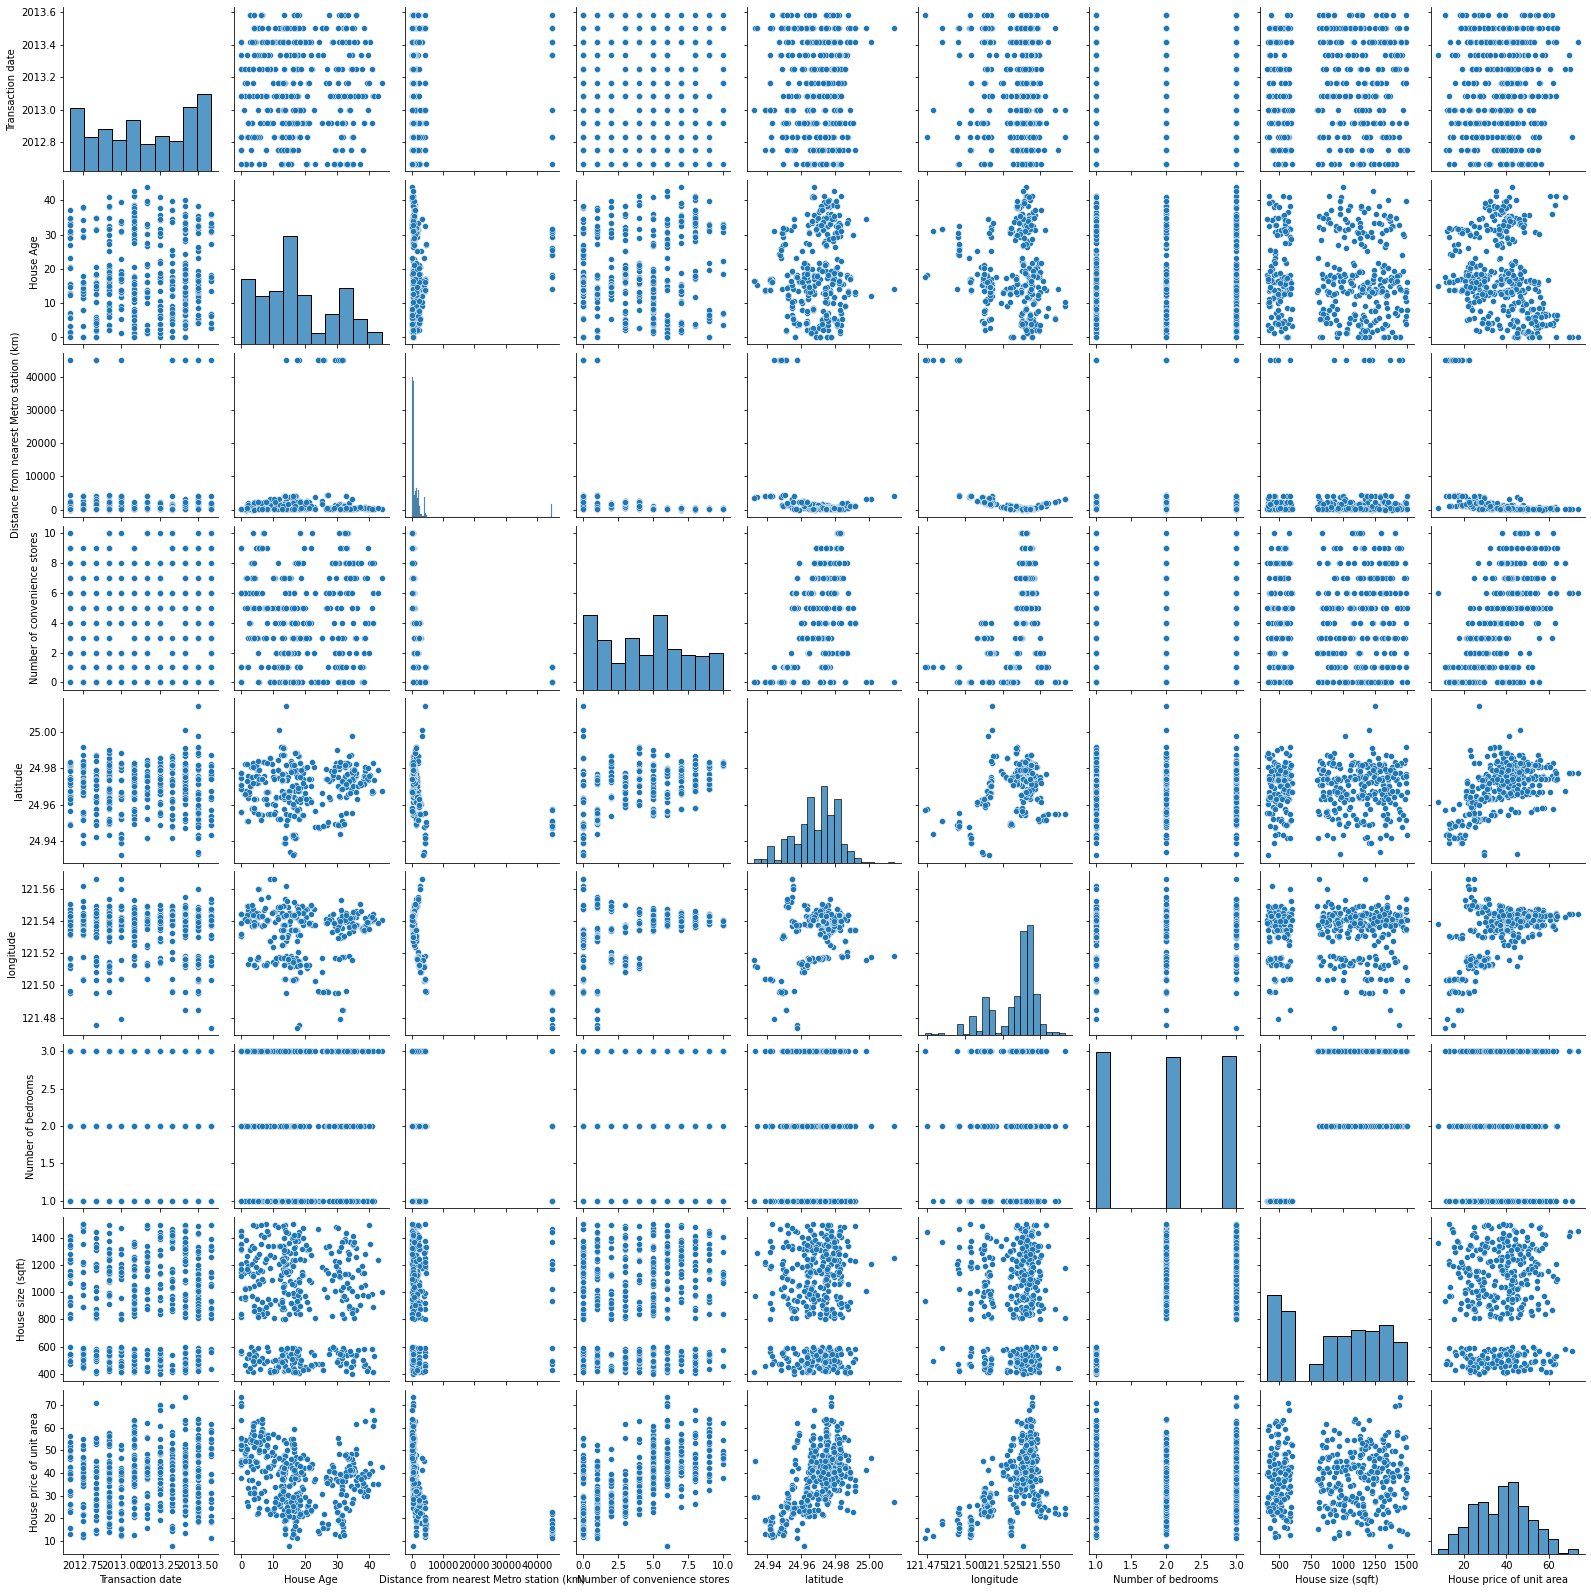

In [12]:
sns.pairplot(df)

In [13]:
X= df[['House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores',
       'Number of bedrooms', 'House size (sqft)']]
y= df['House price of unit area']

In [14]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from lazypredict.Supervised import LazyRegressor

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [17]:
X_train.shape

(287, 5)

Here I've used Lazy Regressor which trains data on various vanilla regressors and compare them. Main Advantage of Lazy Regressor is we don't have to import all regressor models one by one individually and decreases the chance of missing a model which will fit best on the data. We don't have to create a function and loop the data with each model to fit().

In [18]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:05<00:00,  8.11it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.79       0.80   5.61   
GradientBoostingRegressor                    0.76       0.77   6.05   
RandomForestRegressor                        0.75       0.76   6.17   
HistGradientBoostingRegressor                0.74       0.75   6.24   
LGBMRegressor                                0.73       0.74   6.43   
BaggingRegressor                             0.71       0.73   6.56   
XGBRegressor                                 0.71       0.72   6.58   
AdaBoostRegressor                            0.67       0.68   7.04   
KNeighborsRegressor                          0.56       0.58   8.16   
PoissonRegressor                             0.47       0.49   8.93   
LassoLarsIC                                  0.45       0.47   9.09   
LassoCV                                      0.45       0.47   9.10   
LassoL

From Lazy Regressor's result, I can conclude that ExtraTreesRegressor is the best as it has high R2 value and lowest RMSE.

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)

ExtraTreesRegressor()

In [20]:
y_pred = ETR.predict(X_test)
y_pred

array([37.06 , 38.916, 41.045, 47.941, 36.706, 46.524, 38.264, 48.008,
       46.816, 56.554, 43.865, 16.966, 27.754, 57.643, 43.003, 46.656,
       36.454, 25.977, 43.68 , 45.429, 39.264, 21.879, 55.851, 47.3  ,
       23.687, 50.264, 20.789, 31.501, 43.097, 38.814, 43.867, 40.452,
       38.249, 35.477, 31.081, 37.322, 34.999, 25.073, 12.564, 27.17 ,
       22.798, 18.44 , 27.188, 36.906, 37.257, 26.813, 57.91 , 18.123,
       19.173, 39.705, 53.055, 15.37 , 54.522, 17.772, 39.288, 28.622,
       16.845, 31.802, 37.891, 71.116, 60.3  , 49.26 , 47.223, 41.403,
       42.7  , 36.296, 25.959, 54.176, 26.647, 40.021, 34.992, 48.338,
       46.675, 42.922, 32.537, 46.688, 48.436, 14.26 , 48.054, 14.771,
       42.576, 36.631, 42.456, 22.588, 42.196, 13.599, 31.276, 36.872,
       40.16 , 19.29 , 60.008, 40.577, 39.582, 29.383, 26.832, 37.732,
       27.131, 52.425, 37.615, 40.805, 48.266, 50.544, 39.727, 33.123,
       21.212, 38.324, 40.646, 28.771, 24.036, 46.5  , 46.746, 48.481,
      

In [21]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [22]:
RMSE

5.722381029358438

I dit it just to cross-verify Lazy Regressor's result

Now to predict values using custom input

In [23]:
print("Enter the Details:")
print("\nHouse Age\nDistance from nearest Metro station (km)\nNumber of convenience stores\nNumber of bedrooms\nHouse size (sqft)\n")
new_data = []
for i in range(0,5):
  ele = input()
  new_data.append(ele)

Enter the Details:

House Age
Distance from nearest Metro station (km)
Number of convenience stores
Number of bedrooms
House size (sqft)

10
2
3
4
800


In [24]:
find = pd.DataFrame(new_data).T

In [25]:
print("Price of house per sqft: ",ETR.predict(find))

Price of house per sqft:  [39.634]
